Visualizations of data produced from Maeda model and relokate package

author : Jessica Gaines

date : 07-2020

0.0
7.65978641028e-312
7.659786609223e-312
TTCL = 57.0
TTCD = 15.283562796963487
TBCL = 119.2
TBCD = 17.345521697663496
LA = 14.409465789794922
LP = 13.018088340759277


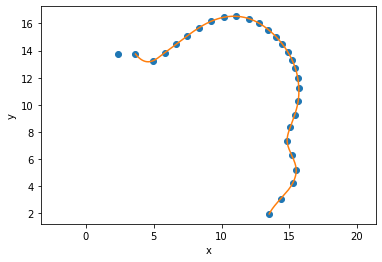

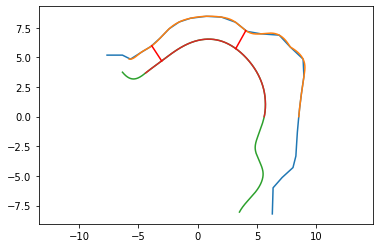

[57.0,
 15.283562796963487,
 119.2,
 17.345521697663496,
 14.409465789794922,
 13.018088340759277]

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from IPython.display import Image
import matplotlib.cm as cm
import matplotlib.colors as colors
from makeTrainingData import find_artic_params
import maeda as mda
color_list = ['red','orange','yellow','green','blue','purple','black']

TC = np.array([1,1,0,0], 'float32')
PC = np.array([0.00114,35000,1600,1.5,300000], 'float32')
AM = np.array([0,0,0,0,0,0,0], 'float32') 
anc = 0.0
formant,internal_x,internal_y,external_x,external_y= mda.maedaplant(5,29,29,29,29,TC,PC,AM,anc)
palateCon=np.loadtxt("palate_contour.txt")
find_artic_params(internal_x,internal_y,external_x,external_y,palateCon,plot=True,verbose=True)

In [2]:
# import data into dataframe and verify dataframe dimensions
def read_in_data(path):
    AMs = pd.read_csv(path + '/AM_0.csv',header=None)
    AMs.columns = ['jaw','tongue','shape','apex','lip_ht','lip_pr','larynx'][0:AMs.shape[1]]
    formants = pd.read_csv(path + '/formants_0.csv',header=None,names=range(5))
    task_params = pd.read_csv(path + '/vocal_tract_0.csv',header=None,names=['TTCL','TTCD','TBCL','TBCD','LA','LP'])
    i = 1
    while True:
        try:
            AM = pd.read_csv(path + '/AM_' + str(i) + '.csv',header=None,names=AMs.columns)
            formant = pd.read_csv(path + '/formants_' + str(i) + '.csv',header=None,names=formants.columns)
            task = pd.read_csv(path + '/vocal_tract_' + str(i) + '.csv',header=None,names=task_params.columns)
        except:
            break
        AMs = AMs.append(AM)
        formants = formants.append(formant)
        task_params = task_params.append(task)
        i += 1 
    AMs.reset_index(drop=True, inplace=True)
    formants.reset_index(drop=True, inplace=True)
    task_params.reset_index(drop=True, inplace=True)
    print(AMs.shape)
    print(formants.shape)
    print(task_params.shape)
    return AMs,formants,task_params

# read in dataset from random walks _rw
read_path = 'training_data_rw_long'
write_path = 'C:/Users/JLG/Documents/GraduateSchool/Lab/Submissions/JASA-EL2021/post-4-13-meeting/'
AMs_rw,formants_rw,task_params_rw = read_in_data(read_path)
task_params_rw = task_params_rw[task_params_rw['TTCD'] >= 5]
task_params_rw = task_params_rw[task_params_rw['TBCD'] >= 5]
AMs_rw = AMs_rw.iloc[task_params_rw.index,:]
formants_rw = formants_rw.iloc[task_params_rw.index,:]
task_params_rw.reset_index(drop=True,inplace=True)
AMs_rw.reset_index(drop=True,inplace=True)
formants_rw.reset_index(drop=True,inplace=True)
print(task_params_rw.shape)
print(AMs_rw.shape)
print(formants_rw.shape)

(1200050, 6)
(1200050, 5)
(1200050, 6)
(1007104, 6)
(1007104, 6)
(1007104, 5)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


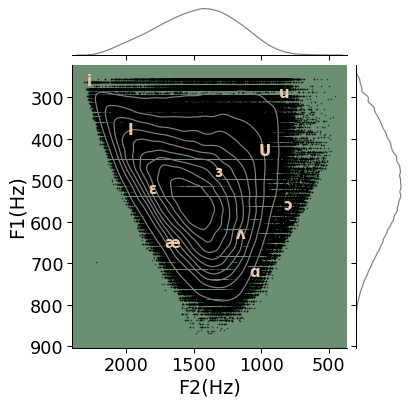

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


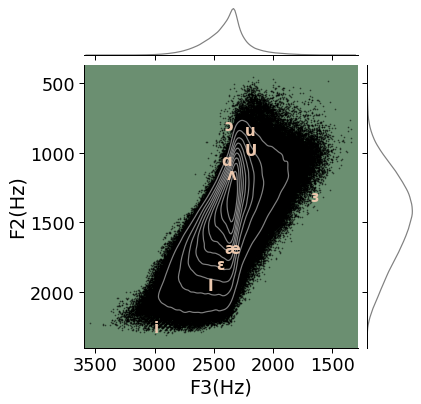

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


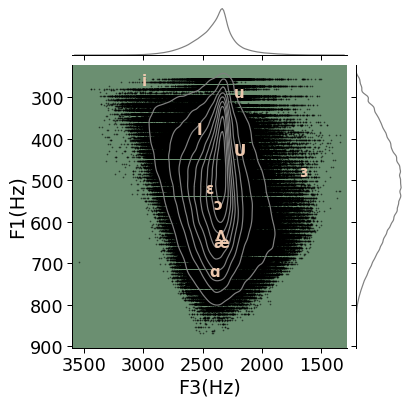

In [13]:
male_formant_dict = {'i':[270,2290,3010],
                     'I':[390,1990,2550],
                     'ε':[530,1840,2480],
                     'æ':[660,1720,2410],
                     'ɑ':[730,1090,2440],
                     'ɔ':[570,840,2410],
                     'U':[440,1020,2240],
                     'u':[300,870,2240],
                     'ʌ':[640,1190,2390],
                     'ɜ':[490,1350,1690]
                    }

def formant_graph(df,which_formants=[2,1],title='',male_vowels=None,female_vowels=None):
    sns.set_context("paper", font_scale=2)
    fig = sns.jointplot(x=which_formants[0]-1,y=which_formants[1]-1,data=df,kind='kde',color='gray')
    fig.plot_joint(plt.scatter, c="black", s=2, linewidth=1, marker=".",alpha=0.5)
    fig.fig.suptitle(title)
    ax = fig.fig.axes[0]
    ax.invert_xaxis()
    ax.invert_yaxis()
    ax.set_facecolor('#6B8F71')
    s = 20
    if male_vowels:
        color = '#ECC8AE'
        for key in male_vowels.keys():
            vals = male_vowels.get(key)
            male_vowels_x = vals[which_formants[0]-1]
            male_vowels_y = vals[which_formants[1]-1]
            #plt.scatter(male_vowels_x,male_vowels_y,color=color,label='Avg. Male',s=15)
            plt.annotate(key,(male_vowels_x,male_vowels_y),color=color,size=15,weight='bold')
    fig.set_axis_labels('F'+str(which_formants[0]) + '(Hz)', 'F' + str(which_formants[1]) + '(Hz)')
    plt.savefig(write_path + 'F' + str(which_formants[1]) +'-' + 'F' + str(which_formants[0]) + '.eps', format='eps', dpi=600)
    plt.show()
formant_graph(formants_rw,which_formants=[2,1],male_vowels=male_formant_dict)
formant_graph(formants_rw,which_formants=[3,2],male_vowels=male_formant_dict)
formant_graph(formants_rw,which_formants=[3,1],male_vowels=male_formant_dict)

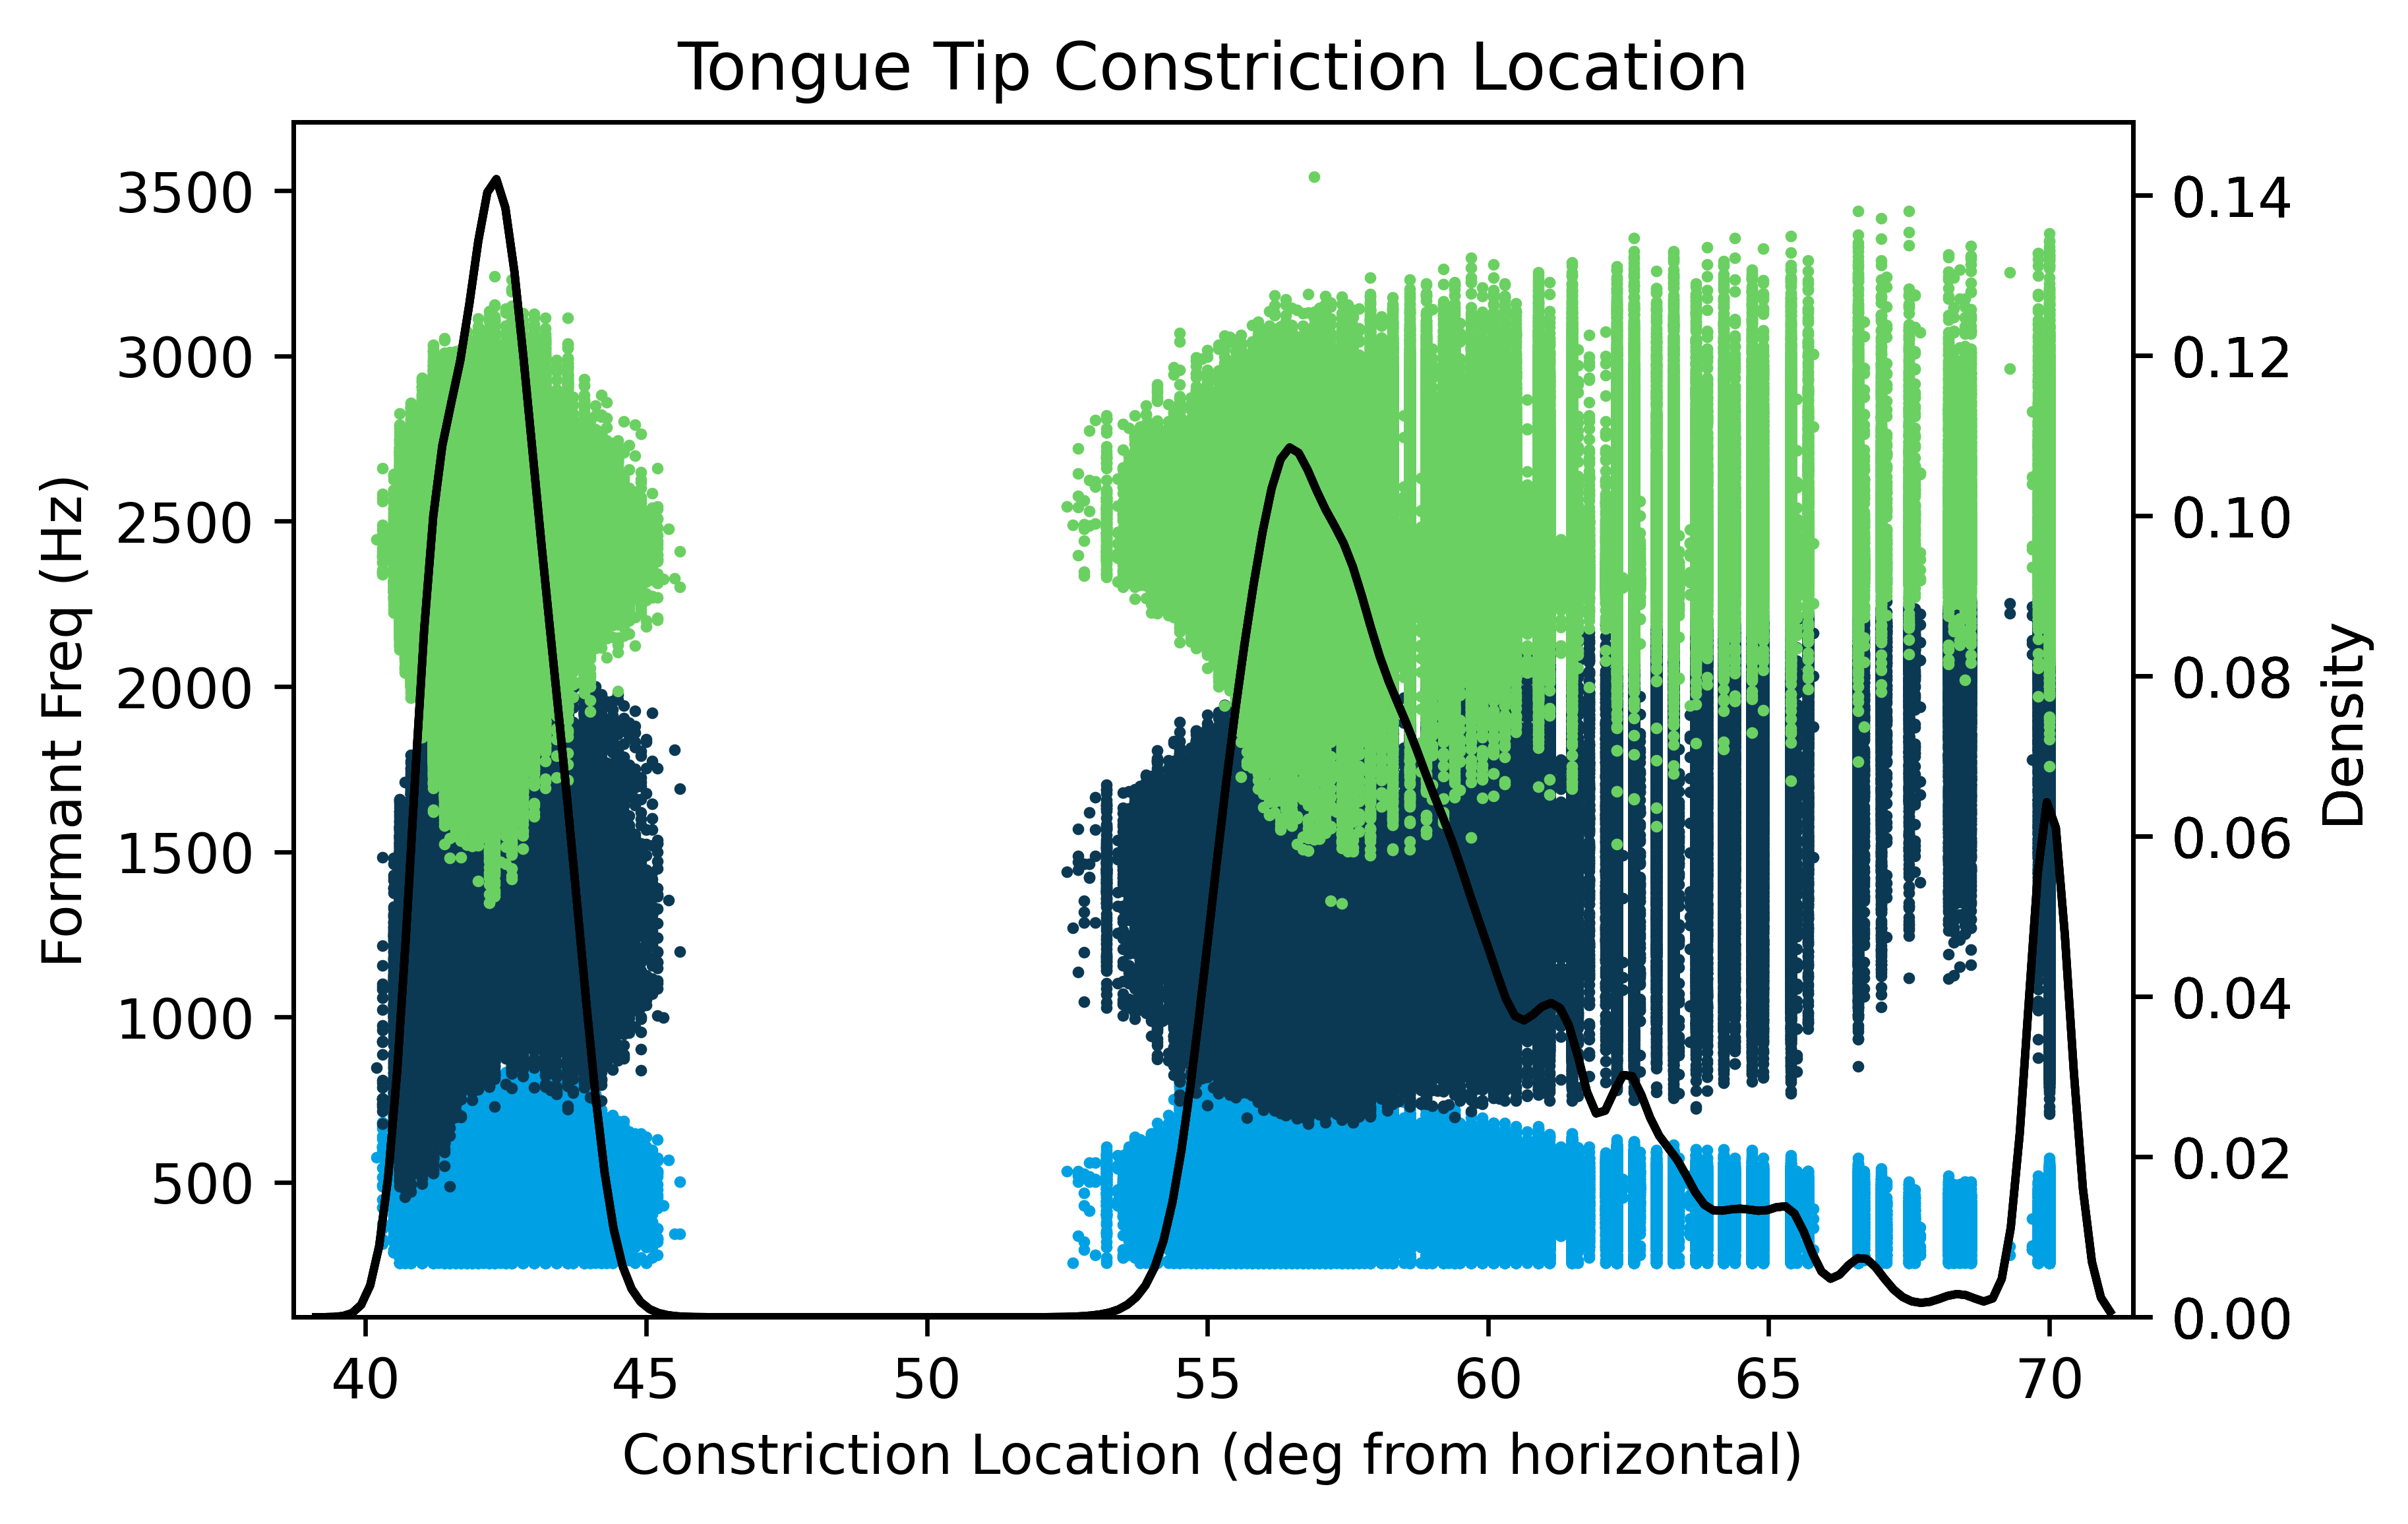

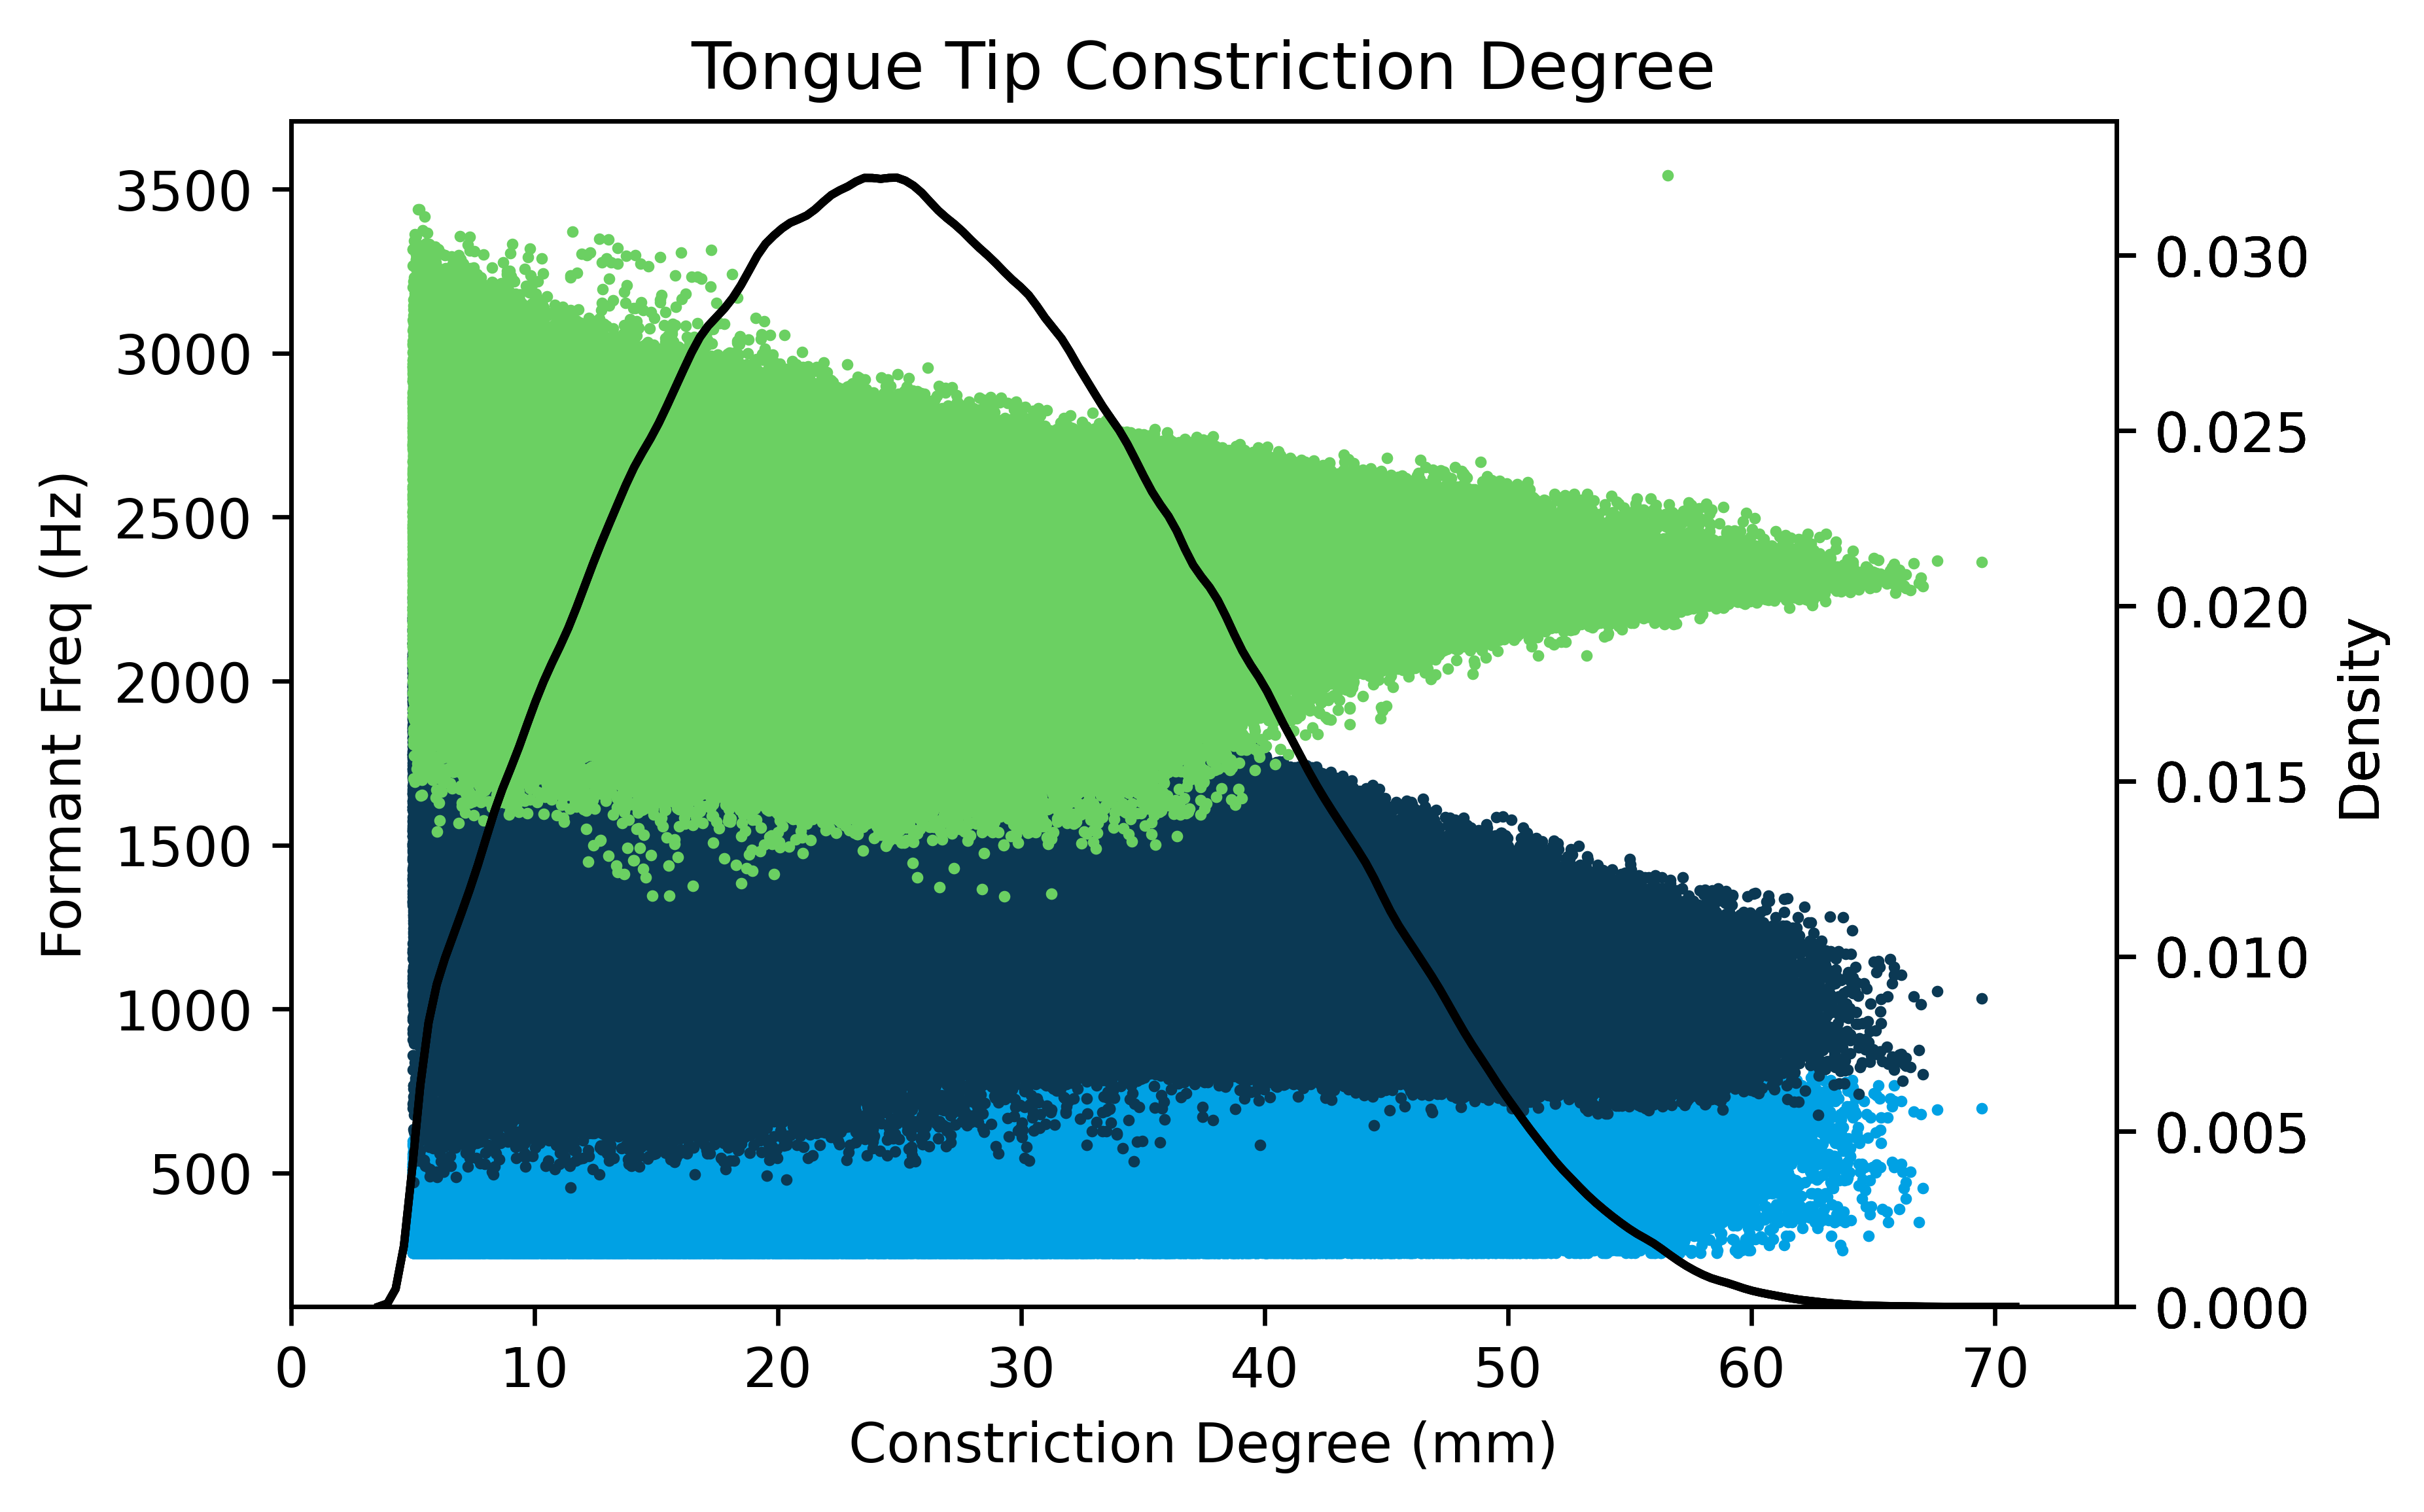

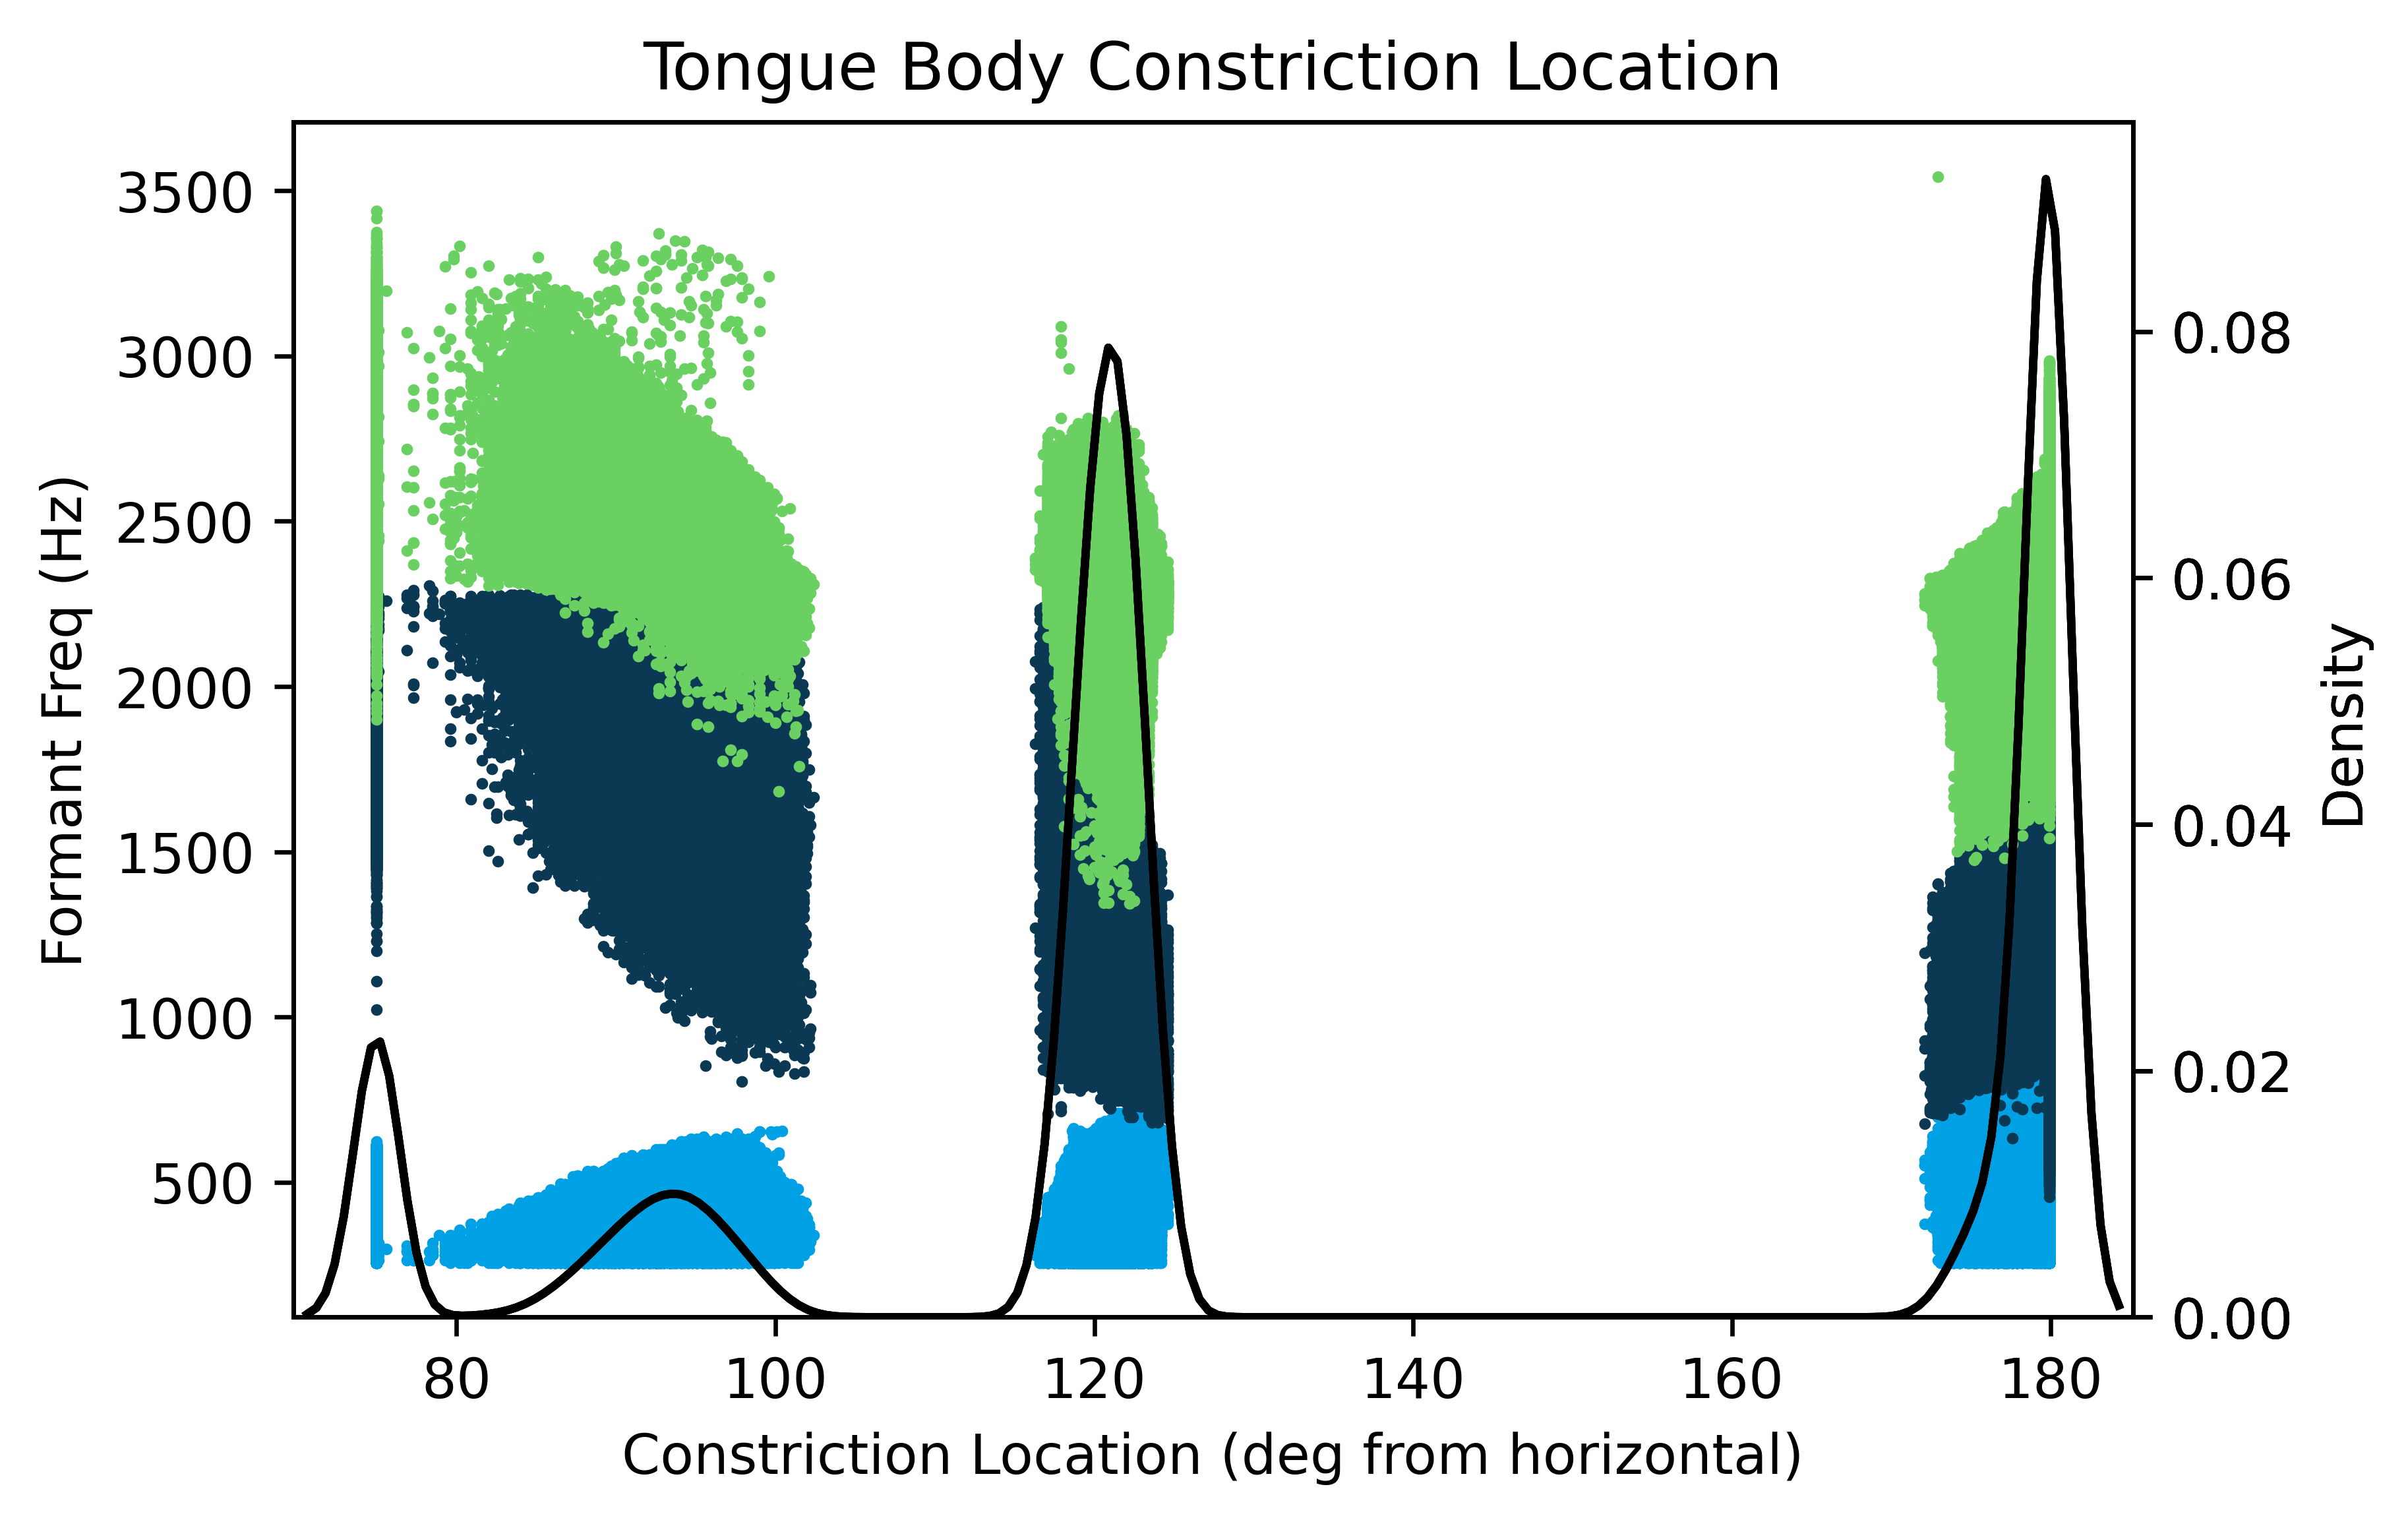

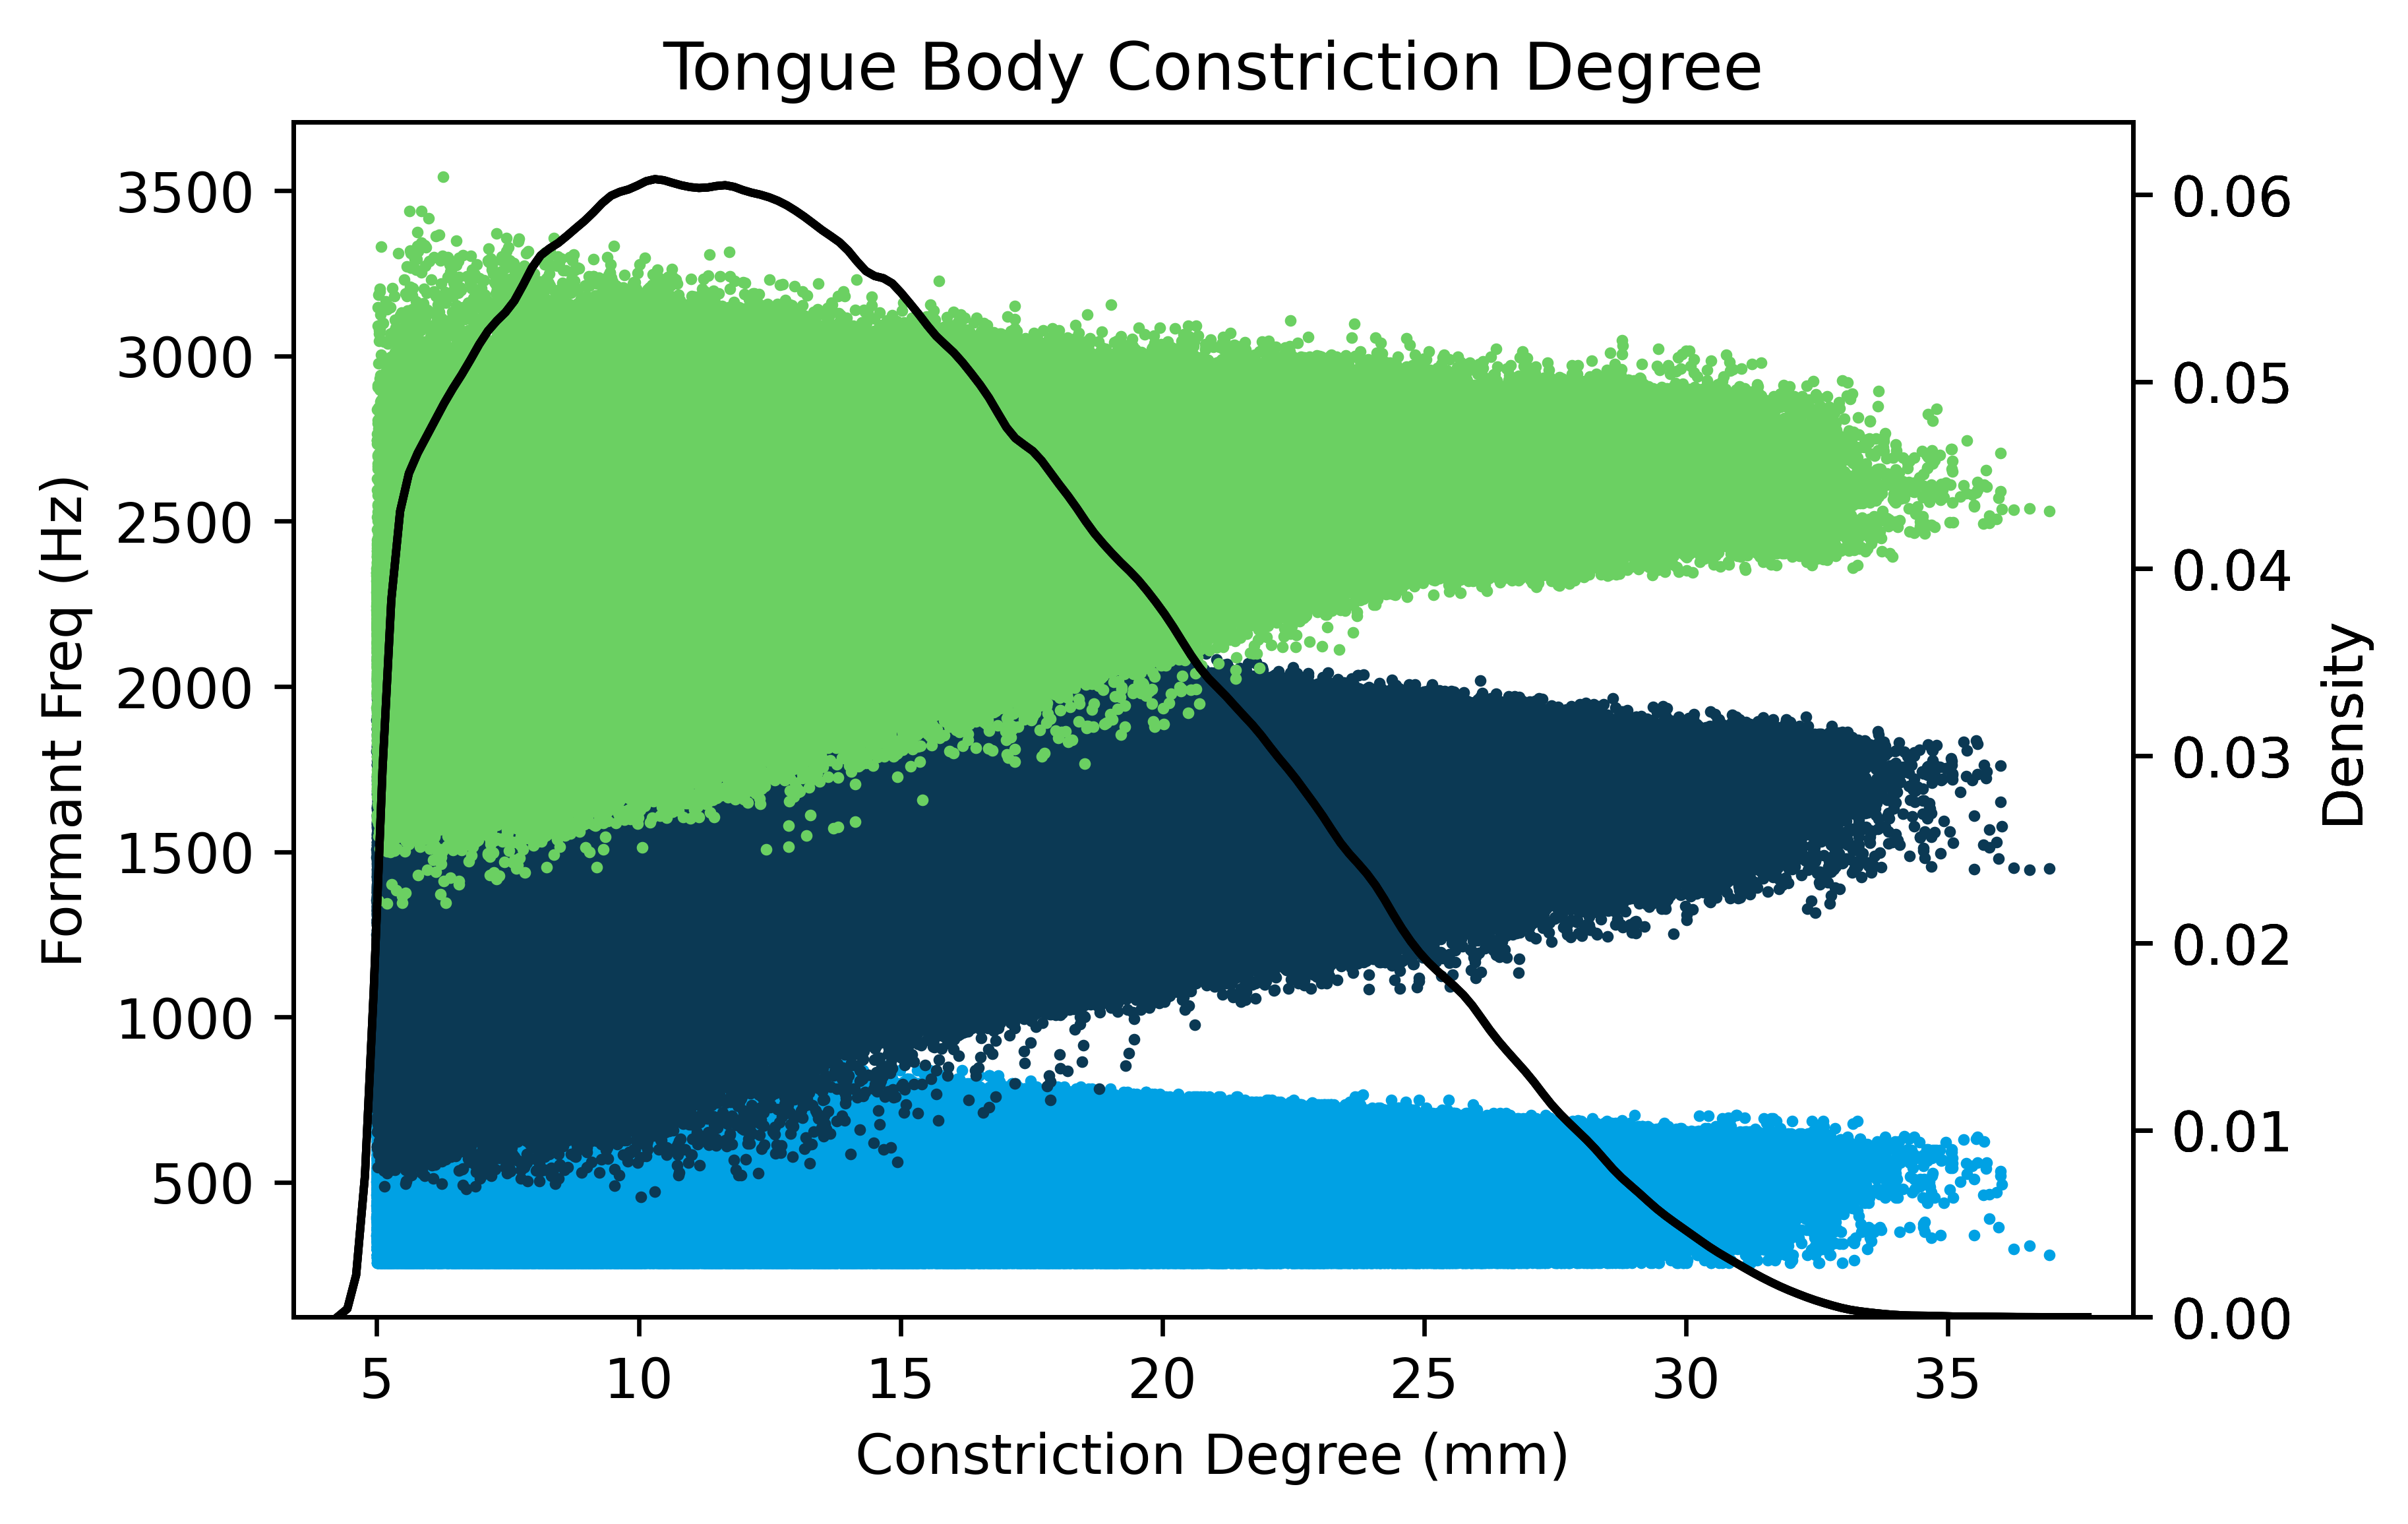

In [11]:
# visualize the spread of each formant as a function of each task parameter
def formant_spread_by_task_param(formants_df,task_params_df):
    color_list = ['#00A1E4','#0B3954','#6BD062']
    which_formants = np.array([1,2,3])
    #fig = plt.figure(figsize=(15,7))
    i = 1
    for t in ['TTCL','TTCD','TBCL','TBCD']:
        fig = plt.figure(dpi=600)
        ax = fig.add_subplot(1,1,1)
        c = 0
        for f in formants_df.columns[which_formants-1]:
            ax.scatter(task_params_df[t],formants_df[f],color=color_list[c],marker='.',label='F'+str(f+1),s=5)
            ax2 = ax.twinx()
            sns.kdeplot(task_params_df[t],bw_method=0.04,color='black')
            c += 1
        mn = task_params_df[t].min()
        mx = task_params_df[t].max()
        ax.set_xlim([mn-0.05*(mx-mn),mx+0.05*(mx-mn)])
        i += 1
        #ax.set_title(t)
        if 'CL' in t:
            ax.set_xlabel('Constriction Location (deg from horizontal)')
            ax2.set_xlabel('test')
            if 'TT' in t:
                ax.set_title('Tongue Tip Constriction Location')
            if 'TB' in t:
                ax.set_title('Tongue Body Constriction Location')
        if 'CD' in t:
            ax.set_xlabel('Constriction Degree (mm)')
            ax2.set_xlabel('test')
            if 'TT' in t:
                ax.set_title('Tongue Tip Constriction Degree')
                ax.set_xlim([0,75])
            if 'TB' in t:
                ax.set_title('Tongue Body Constriction Degree')
        ax.set_ylabel('Formant Freq (Hz)')
        ax2.set_ylabel('Density')
        #ax.legend()
        #plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.3,wspace=0.4)
        plt.savefig(write_path + t + '.eps', format='eps', dpi=600)
        plt.show()
formant_spread_by_task_param(formants_rw,task_params_rw)

In [15]:
# visualize the density of valid combinations for each pair of articulatory parameters
def two_d_maeda_params(df):
    fig, axes = plt.subplots(nrows=len(df.columns), ncols=len(df.columns), figsize=(20, 20),dpi=600)
    for i,am1 in enumerate(df.columns):
        for j,am2 in enumerate(df.columns):
            ax = axes[i][j]
            ax.hist2d(df[am1],df[am2],bins=np.linspace(-3,3,20),cmap=plt.cm.Greys)
            #ax.set_title(am1 + ' and ' + am2)
            #ax.set_xlabel(am1)
            #ax.set_ylabel(am2)
            ax.set_xticks(ticks=[])
            ax.set_yticks(ticks=[])
    cols = df.columns
    rows = df.columns
    for ax, col in zip(axes[0], cols):
        ax.set_title(col,size=35)
    for ax, row in zip(axes[:,0], rows):
        ax.set_ylabel(row,size=35)
        ax.set_yticks(ticks=range(-3,4))
    for ax, col in zip(axes[-1],cols):
        ax.set_xticks(ticks=range(-3,4))
    plt.tight_layout()
    plt.show()
two_d_maeda_params(AMs_rw.iloc[:,0:6])
plt.savefig(write_path + '2dhist.eps', format='eps', dpi=600)

<Figure size 432x288 with 0 Axes>

In [5]:
# Across each Maeda parameter, visualize the change in distribution for each task parameter
def dist_across_task_params(ams_df,task_params_df,bw_method=None):
    color_list = ['#2A1E5C','#432A58','#583654','#8C4E4B','#BD6643','#D5723F','#ED7D3A']
    tasks = ['TTCL','TTCD','TBCL','TBCD']
    fig, axes = plt.subplots(nrows=len(tasks), ncols=len(ams_df.columns), figsize=(30, 15))
    for i,am in enumerate(ams_df.columns):
        for j,t in enumerate(tasks):
            ax = axes[j][i]
            #ax.set_title(am)
            #ax.set_xlabel(t)
            c = 0
            vals = np.sort(list(set(ams_df[am])))
            for val in vals:
                task_params_sub = task_params_df[ams_df[am] == val]
                #color = c/len(set(ams_df[am]))
                #task_params_sub[t].plot.kde(ax=ax,color=next(plt.cm.winter),label=val,bw_method=bw_method)
                sns.kdeplot(ax=ax,data=task_params_sub[t],legend=False,label=val,bw_method=bw_method,color=color_list[c])
                c += 1
    cols = ams_df.columns
    rows = tasks
    for ax, col in zip(axes[0], cols):
        ax.set_title(col,size=35)
    for ax, row in zip(axes[:,0], rows):
        ax.set_ylabel(row,size=35)
    axes[j][i].legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0,prop={'size': 18})
    plt.tight_layout()
    plt.savefig(write_path + 'density_plots.eps', format='eps', dpi=600)
    plt.show()

(898755, 6)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


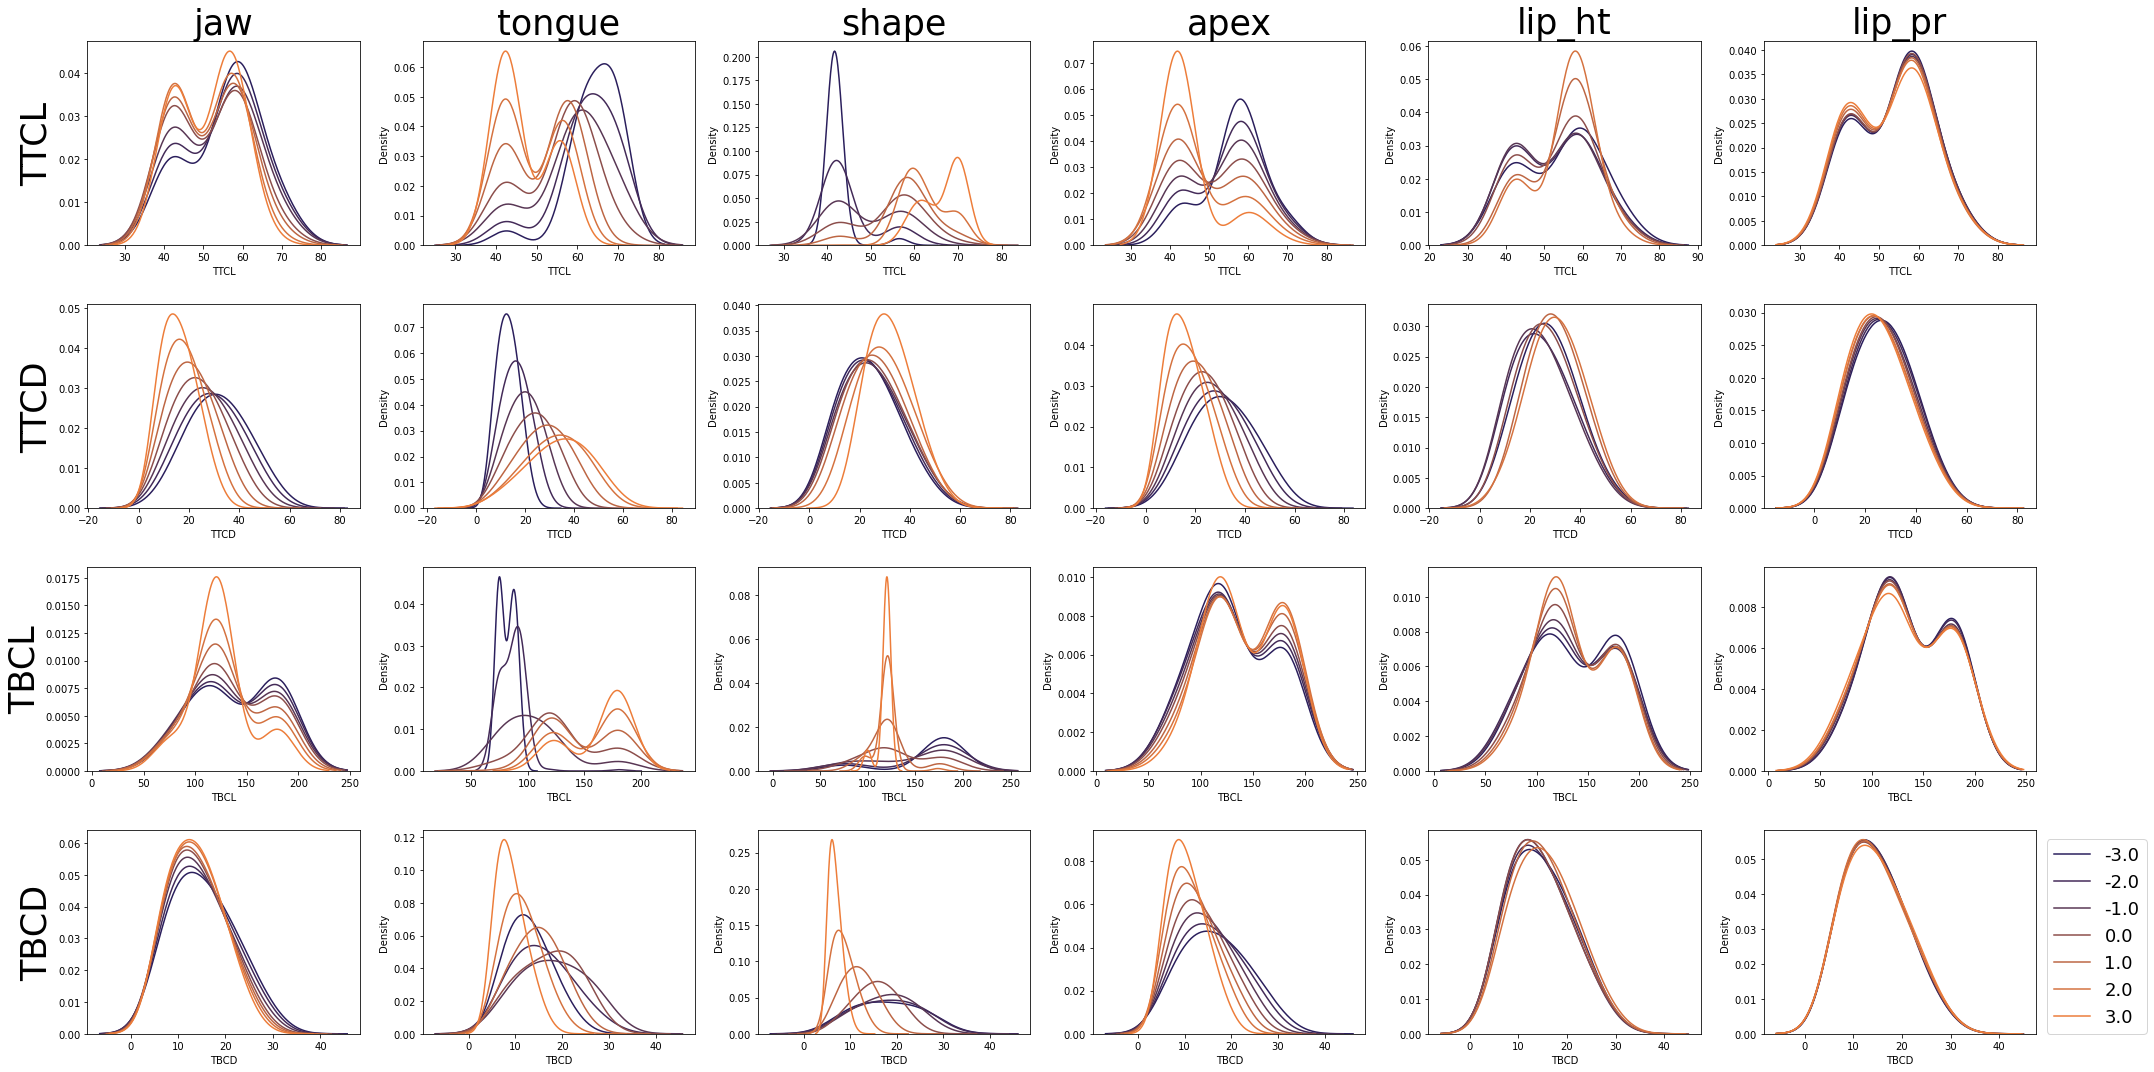

In [6]:
AMs_rw_discrete = round(AMs_rw)
columns = AMs_rw_discrete.columns
for col in columns:
    AMs_rw_discrete.drop(AMs_rw_discrete[AMs_rw_discrete[col] < -3].index, inplace = True)
    AMs_rw_discrete.drop(AMs_rw_discrete[AMs_rw_discrete[col] > 3].index, inplace = True)
print(AMs_rw_discrete.shape)
formants_rw_discrete = formants_rw.iloc[AMs_rw_discrete.index,:]
task_params_rw_discrete = task_params_rw.iloc[AMs_rw_discrete.index,:]
AMs_rw_discrete.reset_index(inplace=True,drop=True)
formants_rw_discrete.reset_index(inplace=True,drop=True)
task_params_rw_discrete.reset_index(inplace=True,drop=True)
AMs_rw_discrete
dist_across_task_params(AMs_rw_discrete,task_params_rw_discrete,bw_method=0.6)

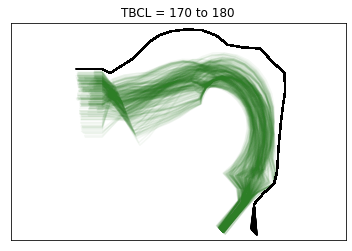

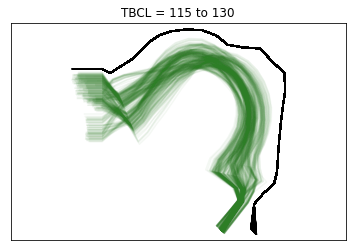

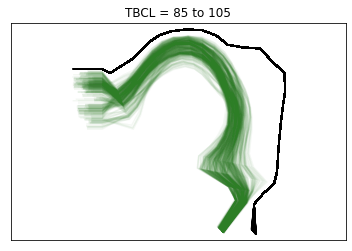

In [14]:
def vocal_tract_median(maeda_df,task_params_df,task_params_col,slice_min, slice_max,max_n_lines=5000,analysis_type=None,lines_to_plot=[],color='gray'):
    TC = np.array([1,1,0,0], 'float32')
    PC = np.array([0.00114,35000,1600,1.5,300000], 'float32')
    anc = 0.0
    AM_slice = maeda_df.loc[(task_params_df[task_params_col] >= slice_min) & (task_params_df[task_params_col] <= slice_max)]
    internal_x_ac = np.zeros((AM_slice.shape[0],29))
    internal_y_ac = np.zeros((AM_slice.shape[0],29))
    external_x_ac = np.zeros((AM_slice.shape[0],29))
    external_y_ac = np.zeros((AM_slice.shape[0],29))
    j = 0
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    for i in AM_slice.index:
        AM = np.array(maeda_df.loc[i], 'float32')
        formant,internal_x,internal_y,external_x,external_y= mda.maedaplant(5,29,29,29,29,TC,PC,AM,anc)
        internal_x_ac[j,:] = internal_x-10
        internal_y_ac[j,:] = internal_y-10
        external_x_ac[j,:] = external_x-10
        external_y_ac[j,:] = external_y-10
        j += 1
        ax.plot(internal_x-10,internal_y-10,color=color,alpha = 0.05)
        ax.plot(external_x-10,external_y-10,color='black')
        if j > max_n_lines:
            break
    ax.set_xlim([-14,14])
    ax.set_ylim([-9,9])
    ax.set_xticks([])
    ax.set_yticks([])
    plt.title(task_params_col + ' = ' + str(slice_min) + ' to ' + str(slice_max))
    plt.savefig(write_path + task_params_col + '_' + str(slice_min) + '-' + str(slice_max) + '.pdf', format='pdf', dpi=600)
    plt.show()
int_color_list = ['red','yellow']
ext_color_list = ['black','black']
n = 500
color = '#2D7e26'
vocal_tract_median(AMs_rw,task_params_rw,'TBCL',170,180,max_n_lines=n,analysis_type=None,color=color)
vocal_tract_median(AMs_rw,task_params_rw,'TBCL',115,130,max_n_lines=n,analysis_type=None,color=color)
vocal_tract_median(AMs_rw,task_params_rw,'TBCL',85,105,max_n_lines=n,analysis_type=None,color=color)

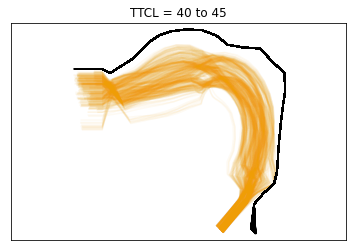

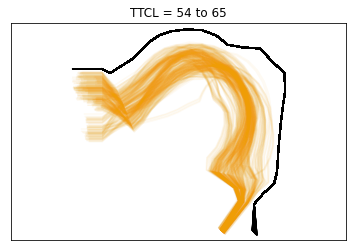

In [13]:
vocal_tract_median(AMs_rw,task_params_rw,'TTCL',40,45,max_n_lines=n,analysis_type=None,color='#EF9D06')
vocal_tract_median(AMs_rw,task_params_rw,'TTCL',54,65,max_n_lines=n,analysis_type=None,color='#EF9D06')

In [ ]:
def vocal_tract_trajectory(AM_slice):
    AM_slice_copy = AM_slice.copy()
    del AM_slice_copy['RW']
    TC = np.array([1,1,0,0], 'float32')
    PC = np.array([0.00114,35000,1600,1.5,300000], 'float32')
    anc = 0.0
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    for i,index in enumerate(AM_slice_copy.index):
        AM_base = np.zeros(7,dtype='float32')
        AM = np.array(AM_slice_copy.iloc[i,:], 'float32')
        AM_base[0:len(AM)] = AM
        formant,internal_x,internal_y,external_x,external_y= mda.maedaplant(5,29,29,29,29,TC,PC,AM_base,anc)
        color = i/AM_slice.shape[0]
        ax.plot(internal_x-10,internal_y-10,color=(1-color,0,color))
        ax.plot(external_x-10,external_y-10,color='black')
    ax.set_xlim([-14,14])
    ax.set_ylim([-9,9])
    plt.title('Random Walk')
    plt.show()